In [1]:
import pandas as pd
from moviepy.editor import VideoFileClip, clips_array
from pathlib import Path

In [2]:
df = pd.read_csv("../data/piracy_val.csv")
df

,Unnamed: 0,ID_piracy,segment,ID_license,segment.1
0,0,ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4,1539-1685,ded3d179001b3f679a0101be95405d2c.mp4,546-692
1,1,t9j5gg42w6s7f62uybhtc51aj5nq9vxd.mp4,158-222,f4b1fd188fe77f9f56de07e867128b13.mp4,392-456
2,2,zui6ud3solfndyetlralstpcjmv3br1f.mp4,139-263,aa16953bbb8fdb2dfc5fc368f4abe89a.mp4,656-780
3,3,aozskym3m7s9ibw5xpgca7m5jqe240vs.mp4,306-449,3219f476e4bc29f6f420e4e6b05ae8bb.mp4,399-542
4,4,3y78kqwdr5lbtsy9tb76n5ylbcrainsx.mp4,517-590,cb718f23524eb08af2f8036eedc6b50c.mp4,119-192
...,...,...,...,...,...
133,133,4ojku252jnbtv04wtnvm73x08xyftpgy.mp4,466-632,fd316c0e150c30ba2156f82e65bfea62.mp4,322-488
134,134,iflvtrjcx50j1kgbb3zgbvpql6zm2gry.mp4,196-471,a808f0de343faf6320bcc94ea57c5381.mp4,462-737
135,135,ztbk9ua8hx1u6l3ol3q5ehh8ugxqlrpd.mp4,165-213,ce9697edebdbec509944e8a010d91d0e.mp4,59-107
136,136,dtpq232karpm09ldxucjqip32hfblrkz.mp4,98-231,8cc8785efca469cdb6fb6efdcd3421d2.mp4,227-360


In [3]:
from glob import glob

files_list = list(
    glob("../data/compressed_index/*.mp4")
) + list(
    glob("../data/compressed_val/*.mp4")
)
file_names = [
    Path(fpath).name for fpath in files_list
]
file_names[:4]

['4d03cff18447ff0e57785eedfea2c0d0.mp4',
 '2b2bd2e70854a4589ec03d48946c639b.mp4',
 '34aa86f7b9f143ac494294e4eb6e1cbf.mp4',
 '35a738eba388a0d4ba332676af7b23d3.mp4']

In [4]:
id_piracy = list(df['ID_piracy'])
id_license = list(df['ID_license'])

In [5]:
len(file_names), len(set(file_names))

(394, 394)

In [6]:
len(set(file_names) & set(id_piracy)), len(id_piracy)

(138, 138)

In [7]:
len(set(file_names) & set(id_license)), len(id_license)

(105, 138)

In [8]:
len(set(id_license) | set(id_piracy)), len(file_names), len(id_license) + len(id_piracy)

(243, 394, 276)

In [9]:
def exists_piracy(row):
    piracy = row["ID_piracy"]
    return Path("../data/compressed_index/" + piracy).exists() or Path("../data/compressed_val/" + piracy).exists()

def exists_val(row):
    license = row["ID_license"]
    return Path("../data/compressed_index/" + license).exists() or Path("../data/compressed_val/" + license).exists()

def get_path(fname):
    if Path("../data/compressed_index/" + fname).exists():
        return "../data/compressed_index/" + fname
    elif Path("../data/compressed_val/" + fname).exists():
        return "../data/compressed_val/" + fname
    raise f"WTF_{fname}"

df["valid_row"] = df.apply(lambda x: exists_piracy(x) and exists_val(x), axis=1)
df["ID_piracy_fpath"] = df.apply(lambda x: get_path(x["ID_piracy"]), axis=1)
df["ID_license_fpath"] = df.apply(lambda x: get_path(x["ID_license"]), axis=1)

In [10]:
df["valid_row"].value_counts()

valid_row
True    138
Name: count, dtype: int64

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", 1000)

In [16]:
df[["ID_piracy_fpath", "ID_license_fpath", "segment", "segment.1"]]

,ID_piracy_fpath,ID_license_fpath,segment,segment.1
0,../data/compressed_val/ydcrodwtz3mstjq1vhbdflx6kyhj3y0p.mp4,../data/compressed_index/ded3d179001b3f679a0101be95405d2c.mp4,1539-1685,546-692
1,../data/compressed_val/t9j5gg42w6s7f62uybhtc51aj5nq9vxd.mp4,../data/compressed_index/f4b1fd188fe77f9f56de07e867128b13.mp4,158-222,392-456
2,../data/compressed_val/zui6ud3solfndyetlralstpcjmv3br1f.mp4,../data/compressed_index/aa16953bbb8fdb2dfc5fc368f4abe89a.mp4,139-263,656-780
3,../data/compressed_val/aozskym3m7s9ibw5xpgca7m5jqe240vs.mp4,../data/compressed_index/3219f476e4bc29f6f420e4e6b05ae8bb.mp4,306-449,399-542
4,../data/compressed_val/3y78kqwdr5lbtsy9tb76n5ylbcrainsx.mp4,../data/compressed_index/cb718f23524eb08af2f8036eedc6b50c.mp4,517-590,119-192
5,../data/compressed_val/13btguedd355hvjhb4w6lqmqnyj1grm7.mp4,../data/compressed_index/050066643aa2aa369216ff6e615d683d.mp4,704-786,617-699
6,../data/compressed_val/2i4k8koiqofszmnag73pqtcfly73fxrm.mp4,../data/compressed_index/27502230e3b28415817c8ff996e97539.mp4,909-1182,243-516
7,../data/compressed_val/5wns7cnfxet9wk6spvjv55n85i5lsc3x.mp4,../data/compressed_index/6282b824b0deb7f7b3fa297a96b44fa1.mp4,406-494,850-938
8,../data/compressed_val/q0upezgticgkrz2khodoz6uuidrpk6r1.mp4,../data/compressed_index/6cc126aeb3f470b591ef20d73c175c6d.mp4,634-670,70-106
9,../data/compressed_val/v1msr87erxoekr3ou8j0xby28ukz5y5q.mp4,../data/compressed_index/df635402135e4ee4f14188be19f35c83.mp4,887-1034,359-506


In [11]:
from IPython.display import display

bad_indicies = []

def create_side_by_side_video(row):
    # Получение значений из строки DataFrame
    piracy_path = row["ID_piracy_fpath"]
    segment_piracy = row['segment']
    license_path = row["ID_license_fpath"]
    segment_license = row['segment.1']

    piracy_start, piracy_end = map(int, segment_piracy.split('-'))
    license_start, license_end = map(int, segment_license.split('-'))

    # Загрузка и обрезка видеофрагментов
    clip_piracy = (VideoFileClip(piracy_path)
                   .subclip(piracy_start, piracy_end))
    clip_license = (VideoFileClip(license_path)
                    .subclip(license_start, license_end))

    # Вывод видео side-by-side
    final_clip = clips_array([[clip_piracy, clip_license]])
    output_path = f"output_RUTUBE/{row['Unnamed: 0']}.mp4"
    final_clip.write_videofile(output_path, codec='libx264')
    print(f"Создан файл: {output_path}")

for _, row in df.iterrows():
    try:
        create_side_by_side_video(row)
    except:
        bad_indicies += [row["Unnamed: 0"]]
        # print("failed to glue", row["Unnamed: 0"])

Moviepy - Building video output_RUTUBE/0.mp4.
MoviePy - Writing audio in 0TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/0.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/0.mp4
Создан файл: output_RUTUBE/0.mp4
Moviepy - Building video output_RUTUBE/1.mp4.
MoviePy - Writing audio in 1TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/1.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/1.mp4
Создан файл: output_RUTUBE/1.mp4
Moviepy - Building video output_RUTUBE/2.mp4.
MoviePy - Writing audio in 2TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/2.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/2.mp4
Создан файл: output_RUTUBE/2.mp4
Moviepy - Building video output_RUTUBE/3.mp4.
MoviePy - Writing audio in 3TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/3.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/3.mp4
Создан файл: output_RUTUBE/3.mp4
Moviepy - Building video output_RUTUBE/4.mp4.
MoviePy - Writing audio in 4TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/4.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/4.mp4
Создан файл: output_RUTUBE/4.mp4
Moviepy - Building video output_RUTUBE/5.mp4.
MoviePy - Writing audio in 5TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/5.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/5.mp4
Создан файл: output_RUTUBE/5.mp4
Moviepy - Building video output_RUTUBE/6.mp4.
MoviePy - Writing audio in 6TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/6.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/6.mp4
Создан файл: output_RUTUBE/6.mp4
Moviepy - Building video output_RUTUBE/7.mp4.
MoviePy - Writing audio in 7TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/7.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/7.mp4
Создан файл: output_RUTUBE/7.mp4
Moviepy - Building video output_RUTUBE/8.mp4.
MoviePy - Writing audio in 8TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/8.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/8.mp4
Создан файл: output_RUTUBE/8.mp4
Moviepy - Building video output_RUTUBE/9.mp4.
MoviePy - Writing audio in 9TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/9.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/9.mp4
Создан файл: output_RUTUBE/9.mp4
Moviepy - Building video output_RUTUBE/10.mp4.
MoviePy - Writing audio in 10TEMP_MPY_wvf_snd.mp3


Moviepy - Building video output_RUTUBE/11.mp4.
MoviePy - Writing audio in 11TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/11.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/11.mp4
Создан файл: output_RUTUBE/11.mp4
Moviepy - Building video output_RUTUBE/12.mp4.
MoviePy - Writing audio in 12TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/12.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/12.mp4
Создан файл: output_RUTUBE/12.mp4
Moviepy - Building video output_RUTUBE/13.mp4.
MoviePy - Writing audio in 13TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/13.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/13.mp4
Создан файл: output_RUTUBE/13.mp4
Moviepy - Building video output_RUTUBE/14.mp4.
MoviePy - Writing audio in 14TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/14.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/14.mp4
Создан файл: output_RUTUBE/14.mp4
Moviepy - Building video output_RUTUBE/15.mp4.
MoviePy - Writing audio in 15TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/15.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/15.mp4
Создан файл: output_RUTUBE/15.mp4
Moviepy - Building video output_RUTUBE/16.mp4.
MoviePy - Writing audio in 16TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/16.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/16.mp4
Создан файл: output_RUTUBE/16.mp4
Moviepy - Building video output_RUTUBE/17.mp4.
MoviePy - Writing audio in 17TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/17.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/17.mp4
Создан файл: output_RUTUBE/17.mp4
Moviepy - Building video output_RUTUBE/18.mp4.
MoviePy - Writing audio in 18TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/18.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/18.mp4
Создан файл: output_RUTUBE/18.mp4
Moviepy - Building video output_RUTUBE/19.mp4.
MoviePy - Writing audio in 19TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/19.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/19.mp4
Создан файл: output_RUTUBE/19.mp4
Moviepy - Building video output_RUTUBE/20.mp4.
MoviePy - Writing audio in 20TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/20.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/20.mp4
Создан файл: output_RUTUBE/20.mp4
Moviepy - Building video output_RUTUBE/21.mp4.
MoviePy - Writing audio in 21TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/21.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/21.mp4
Создан файл: output_RUTUBE/21.mp4
Moviepy - Building video output_RUTUBE/22.mp4.
MoviePy - Writing audio in 22TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/22.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/22.mp4
Создан файл: output_RUTUBE/22.mp4
Moviepy - Building video output_RUTUBE/23.mp4.
MoviePy - Writing audio in 23TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/23.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/23.mp4
Создан файл: output_RUTUBE/23.mp4
Moviepy - Building video output_RUTUBE/24.mp4.
MoviePy - Writing audio in 24TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/24.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/24.mp4
Создан файл: output_RUTUBE/24.mp4
Moviepy - Building video output_RUTUBE/25.mp4.
MoviePy - Writing audio in 25TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/25.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/25.mp4
Создан файл: output_RUTUBE/25.mp4
Moviepy - Building video output_RUTUBE/26.mp4.
MoviePy - Writing audio in 26TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/26.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/26.mp4
Создан файл: output_RUTUBE/26.mp4
Moviepy - Building video output_RUTUBE/27.mp4.
MoviePy - Writing audio in 27TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/27.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/27.mp4
Создан файл: output_RUTUBE/27.mp4
Moviepy - Building video output_RUTUBE/28.mp4.
MoviePy - Writing audio in 28TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/28.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/28.mp4
Создан файл: output_RUTUBE/28.mp4
Moviepy - Building video output_RUTUBE/29.mp4.
MoviePy - Writing audio in 29TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/29.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/29.mp4
Создан файл: output_RUTUBE/29.mp4
Moviepy - Building video output_RUTUBE/30.mp4.
MoviePy - Writing audio in 30TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/30.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/30.mp4
Создан файл: output_RUTUBE/30.mp4
Moviepy - Building video output_RUTUBE/31.mp4.
MoviePy - Writing audio in 31TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/31.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/31.mp4
Создан файл: output_RUTUBE/31.mp4
Moviepy - Building video output_RUTUBE/32.mp4.
MoviePy - Writing audio in 32TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/32.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/32.mp4
Создан файл: output_RUTUBE/32.mp4
Moviepy - Building video output_RUTUBE/33.mp4.
MoviePy - Writing audio in 33TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/33.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/33.mp4
Создан файл: output_RUTUBE/33.mp4
Moviepy - Building video output_RUTUBE/34.mp4.
MoviePy - Writing audio in 34TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/34.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/34.mp4
Создан файл: output_RUTUBE/34.mp4
Moviepy - Building video output_RUTUBE/35.mp4.
MoviePy - Writing audio in 35TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/35.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/35.mp4
Создан файл: output_RUTUBE/35.mp4
Moviepy - Building video output_RUTUBE/36.mp4.
MoviePy - Writing audio in 36TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/36.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/36.mp4
Создан файл: output_RUTUBE/36.mp4
Moviepy - Building video output_RUTUBE/37.mp4.
MoviePy - Writing audio in 37TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/37.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/37.mp4
Создан файл: output_RUTUBE/37.mp4
Moviepy - Building video output_RUTUBE/38.mp4.
MoviePy - Writing audio in 38TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/38.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/38.mp4
Создан файл: output_RUTUBE/38.mp4
Moviepy - Building video output_RUTUBE/39.mp4.
MoviePy - Writing audio in 39TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/39.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/39.mp4
Создан файл: output_RUTUBE/39.mp4
Moviepy - Building video output_RUTUBE/40.mp4.
MoviePy - Writing audio in 40TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/40.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/40.mp4
Создан файл: output_RUTUBE/40.mp4
Moviepy - Building video output_RUTUBE/41.mp4.
MoviePy - Writing audio in 41TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/41.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/41.mp4
Создан файл: output_RUTUBE/41.mp4
Moviepy - Building video output_RUTUBE/42.mp4.
MoviePy - Writing audio in 42TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/42.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/42.mp4
Создан файл: output_RUTUBE/42.mp4
Moviepy - Building video output_RUTUBE/43.mp4.
MoviePy - Writing audio in 43TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/43.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/43.mp4
Создан файл: output_RUTUBE/43.mp4
Moviepy - Building video output_RUTUBE/44.mp4.
MoviePy - Writing audio in 44TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/44.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/44.mp4
Создан файл: output_RUTUBE/44.mp4
Moviepy - Building video output_RUTUBE/45.mp4.
MoviePy - Writing audio in 45TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/45.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/45.mp4
Создан файл: output_RUTUBE/45.mp4
Moviepy - Building video output_RUTUBE/46.mp4.
MoviePy - Writing audio in 46TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/46.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/46.mp4
Создан файл: output_RUTUBE/46.mp4
Moviepy - Building video output_RUTUBE/47.mp4.
MoviePy - Writing audio in 47TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/47.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/47.mp4
Создан файл: output_RUTUBE/47.mp4
Moviepy - Building video output_RUTUBE/48.mp4.
MoviePy - Writing audio in 48TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/48.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/48.mp4
Создан файл: output_RUTUBE/48.mp4
Moviepy - Building video output_RUTUBE/49.mp4.
MoviePy - Writing audio in 49TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/49.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/49.mp4
Создан файл: output_RUTUBE/49.mp4
Moviepy - Building video output_RUTUBE/50.mp4.
MoviePy - Writing audio in 50TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/50.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/50.mp4
Создан файл: output_RUTUBE/50.mp4
Moviepy - Building video output_RUTUBE/51.mp4.
MoviePy - Writing audio in 51TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/51.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/51.mp4
Создан файл: output_RUTUBE/51.mp4
Moviepy - Building video output_RUTUBE/52.mp4.
MoviePy - Writing audio in 52TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/52.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/52.mp4
Создан файл: output_RUTUBE/52.mp4
Moviepy - Building video output_RUTUBE/53.mp4.
MoviePy - Writing audio in 53TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/53.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/53.mp4
Создан файл: output_RUTUBE/53.mp4
Moviepy - Building video output_RUTUBE/54.mp4.
MoviePy - Writing audio in 54TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/54.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/54.mp4
Создан файл: output_RUTUBE/54.mp4
Moviepy - Building video output_RUTUBE/55.mp4.
MoviePy - Writing audio in 55TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/55.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/55.mp4
Создан файл: output_RUTUBE/55.mp4
Moviepy - Building video output_RUTUBE/56.mp4.
MoviePy - Writing audio in 56TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/56.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/56.mp4
Создан файл: output_RUTUBE/56.mp4
Moviepy - Building video output_RUTUBE/57.mp4.
MoviePy - Writing audio in 57TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/57.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/57.mp4
Создан файл: output_RUTUBE/57.mp4
Moviepy - Building video output_RUTUBE/58.mp4.
MoviePy - Writing audio in 58TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/58.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/58.mp4
Создан файл: output_RUTUBE/58.mp4
Moviepy - Building video output_RUTUBE/59.mp4.
MoviePy - Writing audio in 59TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/59.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/59.mp4
Создан файл: output_RUTUBE/59.mp4
Moviepy - Building video output_RUTUBE/60.mp4.
MoviePy - Writing audio in 60TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/60.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/60.mp4
Создан файл: output_RUTUBE/60.mp4
Moviepy - Building video output_RUTUBE/61.mp4.
MoviePy - Writing audio in 61TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/61.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/61.mp4
Создан файл: output_RUTUBE/61.mp4
Moviepy - Building video output_RUTUBE/62.mp4.
MoviePy - Writing audio in 62TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/62.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/62.mp4
Создан файл: output_RUTUBE/62.mp4
Moviepy - Building video output_RUTUBE/63.mp4.
MoviePy - Writing audio in 63TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/63.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/63.mp4
Создан файл: output_RUTUBE/63.mp4
Moviepy - Building video output_RUTUBE/64.mp4.
MoviePy - Writing audio in 64TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/64.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/64.mp4
Создан файл: output_RUTUBE/64.mp4
Moviepy - Building video output_RUTUBE/65.mp4.
MoviePy - Writing audio in 65TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/65.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/65.mp4
Создан файл: output_RUTUBE/65.mp4
Moviepy - Building video output_RUTUBE/66.mp4.
MoviePy - Writing audio in 66TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/66.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/66.mp4
Создан файл: output_RUTUBE/66.mp4
Moviepy - Building video output_RUTUBE/67.mp4.
MoviePy - Writing audio in 67TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/67.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/67.mp4
Создан файл: output_RUTUBE/67.mp4
Moviepy - Building video output_RUTUBE/68.mp4.
MoviePy - Writing audio in 68TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/68.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/68.mp4
Создан файл: output_RUTUBE/68.mp4
Moviepy - Building video output_RUTUBE/69.mp4.
MoviePy - Writing audio in 69TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/69.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/69.mp4
Создан файл: output_RUTUBE/69.mp4
Moviepy - Building video output_RUTUBE/70.mp4.
MoviePy - Writing audio in 70TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/70.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/70.mp4
Создан файл: output_RUTUBE/70.mp4
Moviepy - Building video output_RUTUBE/71.mp4.
MoviePy - Writing audio in 71TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/71.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/71.mp4
Создан файл: output_RUTUBE/71.mp4
Moviepy - Building video output_RUTUBE/72.mp4.
MoviePy - Writing audio in 72TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/72.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/72.mp4
Создан файл: output_RUTUBE/72.mp4
Moviepy - Building video output_RUTUBE/73.mp4.
MoviePy - Writing audio in 73TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/73.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/73.mp4
Создан файл: output_RUTUBE/73.mp4
Moviepy - Building video output_RUTUBE/74.mp4.
MoviePy - Writing audio in 74TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/74.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/74.mp4
Создан файл: output_RUTUBE/74.mp4
Moviepy - Building video output_RUTUBE/75.mp4.
MoviePy - Writing audio in 75TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/75.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/75.mp4
Создан файл: output_RUTUBE/75.mp4
Moviepy - Building video output_RUTUBE/76.mp4.
MoviePy - Writing audio in 76TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/76.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/76.mp4
Создан файл: output_RUTUBE/76.mp4
Moviepy - Building video output_RUTUBE/77.mp4.
MoviePy - Writing audio in 77TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/77.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/77.mp4
Создан файл: output_RUTUBE/77.mp4
Moviepy - Building video output_RUTUBE/78.mp4.
MoviePy - Writing audio in 78TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/78.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/78.mp4
Создан файл: output_RUTUBE/78.mp4
Moviepy - Building video output_RUTUBE/79.mp4.
MoviePy - Writing audio in 79TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/79.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/79.mp4
Создан файл: output_RUTUBE/79.mp4
Moviepy - Building video output_RUTUBE/80.mp4.
MoviePy - Writing audio in 80TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/80.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/80.mp4
Создан файл: output_RUTUBE/80.mp4
Moviepy - Building video output_RUTUBE/81.mp4.
MoviePy - Writing audio in 81TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/81.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/81.mp4
Создан файл: output_RUTUBE/81.mp4
Moviepy - Building video output_RUTUBE/82.mp4.
MoviePy - Writing audio in 82TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/82.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/82.mp4
Создан файл: output_RUTUBE/82.mp4
Moviepy - Building video output_RUTUBE/83.mp4.
MoviePy - Writing audio in 83TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/83.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/83.mp4
Создан файл: output_RUTUBE/83.mp4
Moviepy - Building video output_RUTUBE/84.mp4.
MoviePy - Writing audio in 84TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/84.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/84.mp4
Создан файл: output_RUTUBE/84.mp4
Moviepy - Building video output_RUTUBE/85.mp4.
MoviePy - Writing audio in 85TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/85.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/85.mp4
Создан файл: output_RUTUBE/85.mp4
Moviepy - Building video output_RUTUBE/86.mp4.
MoviePy - Writing audio in 86TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/86.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/86.mp4
Создан файл: output_RUTUBE/86.mp4
Moviepy - Building video output_RUTUBE/87.mp4.
MoviePy - Writing audio in 87TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/87.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/87.mp4
Создан файл: output_RUTUBE/87.mp4
Moviepy - Building video output_RUTUBE/88.mp4.
MoviePy - Writing audio in 88TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/88.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/88.mp4
Создан файл: output_RUTUBE/88.mp4
Moviepy - Building video output_RUTUBE/89.mp4.
MoviePy - Writing audio in 89TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/89.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/89.mp4
Создан файл: output_RUTUBE/89.mp4
Moviepy - Building video output_RUTUBE/90.mp4.
MoviePy - Writing audio in 90TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/90.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/90.mp4
Создан файл: output_RUTUBE/90.mp4
Moviepy - Building video output_RUTUBE/91.mp4.
MoviePy - Writing audio in 91TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/91.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/91.mp4
Создан файл: output_RUTUBE/91.mp4
Moviepy - Building video output_RUTUBE/92.mp4.
MoviePy - Writing audio in 92TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/92.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/92.mp4
Создан файл: output_RUTUBE/92.mp4
Moviepy - Building video output_RUTUBE/93.mp4.
MoviePy - Writing audio in 93TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/93.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/93.mp4
Создан файл: output_RUTUBE/93.mp4
Moviepy - Building video output_RUTUBE/94.mp4.
MoviePy - Writing audio in 94TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/94.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/94.mp4
Создан файл: output_RUTUBE/94.mp4
Moviepy - Building video output_RUTUBE/95.mp4.
MoviePy - Writing audio in 95TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/95.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/95.mp4
Создан файл: output_RUTUBE/95.mp4
Moviepy - Building video output_RUTUBE/96.mp4.
MoviePy - Writing audio in 96TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/96.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/96.mp4
Создан файл: output_RUTUBE/96.mp4
Moviepy - Building video output_RUTUBE/97.mp4.
MoviePy - Writing audio in 97TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/97.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/97.mp4
Создан файл: output_RUTUBE/97.mp4
Moviepy - Building video output_RUTUBE/98.mp4.
MoviePy - Writing audio in 98TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/98.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/98.mp4
Создан файл: output_RUTUBE/98.mp4
Moviepy - Building video output_RUTUBE/99.mp4.
MoviePy - Writing audio in 99TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/99.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/99.mp4
Создан файл: output_RUTUBE/99.mp4
Moviepy - Building video output_RUTUBE/100.mp4.
MoviePy - Writing audio in 100TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/100.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/100.mp4
Создан файл: output_RUTUBE/100.mp4
Moviepy - Building video output_RUTUBE/101.mp4.
MoviePy - Writing audio in 101TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/101.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/101.mp4
Создан файл: output_RUTUBE/101.mp4
Moviepy - Building video output_RUTUBE/102.mp4.
MoviePy - Writing audio in 102TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/102.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/102.mp4
Создан файл: output_RUTUBE/102.mp4
Moviepy - Building video output_RUTUBE/103.mp4.
MoviePy - Writing audio in 103TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/103.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/103.mp4
Создан файл: output_RUTUBE/103.mp4
Moviepy - Building video output_RUTUBE/104.mp4.
MoviePy - Writing audio in 104TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/104.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/104.mp4
Создан файл: output_RUTUBE/104.mp4
Moviepy - Building video output_RUTUBE/105.mp4.
MoviePy - Writing audio in 105TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/105.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/105.mp4
Создан файл: output_RUTUBE/105.mp4
Moviepy - Building video output_RUTUBE/106.mp4.
MoviePy - Writing audio in 106TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/106.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/106.mp4
Создан файл: output_RUTUBE/106.mp4
Moviepy - Building video output_RUTUBE/107.mp4.
MoviePy - Writing audio in 107TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/107.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/107.mp4
Создан файл: output_RUTUBE/107.mp4
Moviepy - Building video output_RUTUBE/108.mp4.
MoviePy - Writing audio in 108TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/108.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/108.mp4
Создан файл: output_RUTUBE/108.mp4
Moviepy - Building video output_RUTUBE/109.mp4.
MoviePy - Writing audio in 109TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/109.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/109.mp4
Создан файл: output_RUTUBE/109.mp4
Moviepy - Building video output_RUTUBE/110.mp4.
MoviePy - Writing audio in 110TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/110.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/110.mp4
Создан файл: output_RUTUBE/110.mp4
Moviepy - Building video output_RUTUBE/111.mp4.
MoviePy - Writing audio in 111TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/111.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/111.mp4
Создан файл: output_RUTUBE/111.mp4
Moviepy - Building video output_RUTUBE/112.mp4.
MoviePy - Writing audio in 112TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/112.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/112.mp4
Создан файл: output_RUTUBE/112.mp4
Moviepy - Building video output_RUTUBE/113.mp4.
MoviePy - Writing audio in 113TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/113.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/113.mp4
Создан файл: output_RUTUBE/113.mp4
Moviepy - Building video output_RUTUBE/114.mp4.
MoviePy - Writing audio in 114TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/114.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/114.mp4
Создан файл: output_RUTUBE/114.mp4
Moviepy - Building video output_RUTUBE/115.mp4.
MoviePy - Writing audio in 115TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/115.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/115.mp4
Создан файл: output_RUTUBE/115.mp4
Moviepy - Building video output_RUTUBE/116.mp4.
MoviePy - Writing audio in 116TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/116.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/116.mp4
Создан файл: output_RUTUBE/116.mp4
Moviepy - Building video output_RUTUBE/117.mp4.
MoviePy - Writing audio in 117TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/117.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/117.mp4
Создан файл: output_RUTUBE/117.mp4
Moviepy - Building video output_RUTUBE/118.mp4.
MoviePy - Writing audio in 118TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/118.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/118.mp4
Создан файл: output_RUTUBE/118.mp4
Moviepy - Building video output_RUTUBE/119.mp4.
MoviePy - Writing audio in 119TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/119.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/119.mp4
Создан файл: output_RUTUBE/119.mp4
Moviepy - Building video output_RUTUBE/120.mp4.
MoviePy - Writing audio in 120TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/120.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/120.mp4
Создан файл: output_RUTUBE/120.mp4
Moviepy - Building video output_RUTUBE/121.mp4.
MoviePy - Writing audio in 121TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/121.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/121.mp4
Создан файл: output_RUTUBE/121.mp4
Moviepy - Building video output_RUTUBE/122.mp4.
MoviePy - Writing audio in 122TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/122.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/122.mp4
Создан файл: output_RUTUBE/122.mp4
Moviepy - Building video output_RUTUBE/123.mp4.
MoviePy - Writing audio in 123TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/123.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/123.mp4
Создан файл: output_RUTUBE/123.mp4
Moviepy - Building video output_RUTUBE/124.mp4.
MoviePy - Writing audio in 124TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/124.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/124.mp4
Создан файл: output_RUTUBE/124.mp4
Moviepy - Building video output_RUTUBE/125.mp4.
MoviePy - Writing audio in 125TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/125.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/125.mp4
Создан файл: output_RUTUBE/125.mp4
Moviepy - Building video output_RUTUBE/126.mp4.
MoviePy - Writing audio in 126TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/126.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/126.mp4
Создан файл: output_RUTUBE/126.mp4
Moviepy - Building video output_RUTUBE/127.mp4.
MoviePy - Writing audio in 127TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/127.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/127.mp4
Создан файл: output_RUTUBE/127.mp4
Moviepy - Building video output_RUTUBE/128.mp4.
MoviePy - Writing audio in 128TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/128.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/128.mp4
Создан файл: output_RUTUBE/128.mp4
Moviepy - Building video output_RUTUBE/129.mp4.
MoviePy - Writing audio in 129TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/129.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/129.mp4
Создан файл: output_RUTUBE/129.mp4
Moviepy - Building video output_RUTUBE/130.mp4.
MoviePy - Writing audio in 130TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/130.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/130.mp4
Создан файл: output_RUTUBE/130.mp4
Moviepy - Building video output_RUTUBE/131.mp4.
MoviePy - Writing audio in 131TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/131.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/131.mp4
Создан файл: output_RUTUBE/131.mp4
Moviepy - Building video output_RUTUBE/132.mp4.
MoviePy - Writing audio in 132TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/132.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/132.mp4
Создан файл: output_RUTUBE/132.mp4
Moviepy - Building video output_RUTUBE/133.mp4.
MoviePy - Writing audio in 133TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/133.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/133.mp4
Создан файл: output_RUTUBE/133.mp4
Moviepy - Building video output_RUTUBE/134.mp4.
MoviePy - Writing audio in 134TEMP_MPY_wvf_snd.mp3


Moviepy - Building video output_RUTUBE/135.mp4.
MoviePy - Writing audio in 135TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/135.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/135.mp4
Создан файл: output_RUTUBE/135.mp4
Moviepy - Building video output_RUTUBE/136.mp4.
MoviePy - Writing audio in 136TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video output_RUTUBE/136.mp4



Moviepy - Done !
Moviepy - video ready output_RUTUBE/136.mp4
Создан файл: output_RUTUBE/136.mp4
Moviepy - Building video output_RUTUBE/137.mp4.
MoviePy - Writing audio in 137TEMP_MPY_wvf_snd.mp3


chunk:   0%|          | 2/1522 [00:00<02:06, 12.02it/s, now=None]

In [ ]:
bad_indicies

In [12]:
df.iloc[110]

Unnamed: 0                                                        110
ID_piracy                        xdiymvwb8xd5def8kjdkavfvzodd83q0.mp4
segment                                                       571-796
ID_license                       0f0c6bdc92c5e36dd49883ab3622b52c.mp4
segment.1                                                     150-375
valid_row                                                        True
ID_piracy_fpath     RUTUBE/compressed_val/xdiymvwb8xd5def8kjdkavfv...
ID_license_fpath    RUTUBE/compressed_index/0f0c6bdc92c5e36dd49883...
Name: 110, dtype: object

In [14]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


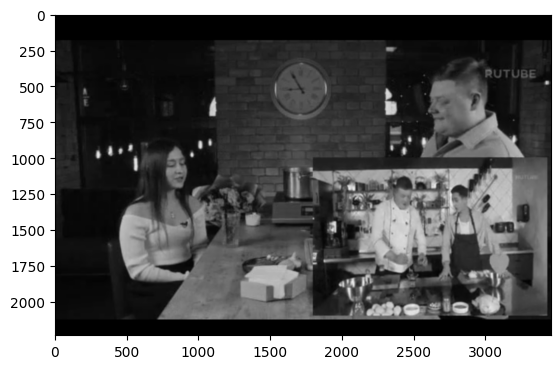

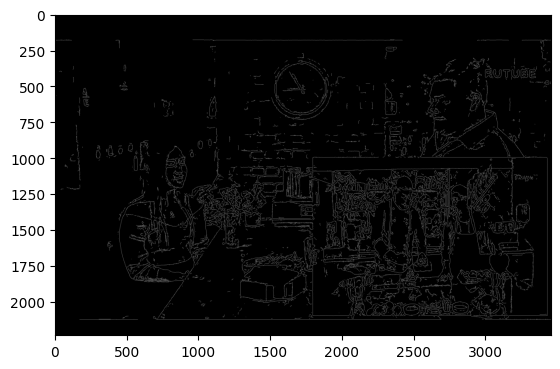

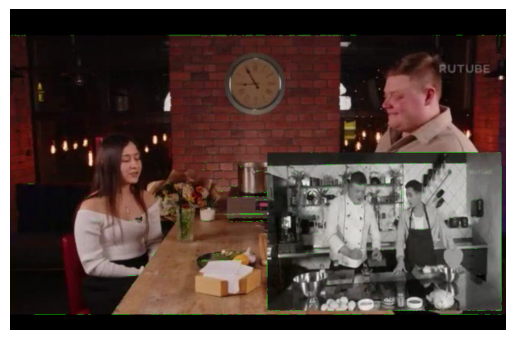

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def detect_rectangles_hough(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Размытие для уменьшения шума
    filtered = cv2.bilateralFilter(image_gray,9,75,75)
    plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
    plt.show()
    # Применение детектора краёв
    edged = cv2.Canny(filtered, 3, 20, apertureSize = 3)
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    plt.show()
    # Применение преобразования Хаффа
    lines = cv2.HoughLinesP(edged, 1, np.pi / 180, threshold=200)
    
    # Создание копии изображения для визуализации
    image_with_lines = image.copy()
    
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
        # Организация линий по координатам
        lines = [line[0] for line in lines]
        horizontal_lines = []
        vertical_lines = []
        
        for x1, y1, x2, y2 in lines:
            if abs(y2 - y1) < 5:  # Горизонтальная линия
                horizontal_lines.append((x1, y1, x2, y2))
            elif abs(x2 - x1) < 5:  # Вертикальная линия
                vertical_lines.append((x1, y1, x2, y2))
        
        rectangles = []
        
        # Ищем пересечения горизонтальных и вертикальных линий
        for h_line in horizontal_lines:
            for v_line in vertical_lines:
                rect_x1 = min(h_line[0], h_line[2])
                rect_y1 = min(v_line[1], v_line[3])
                rect_x2 = max(h_line[0], h_line[2])
                rect_y2 = max(v_line[1], v_line[3])
                
                # Проверка наличия противоположной стороны
                if (rect_x1, rect_y1, rect_x2, rect_y2) not in rectangles:
                    for h_line2 in horizontal_lines:
                        for v_line2 in vertical_lines:
                            if (min(h_line2[0], h_line2[2]), min(v_line2[1], v_line2[3]), max(h_line2[0], h_line2[2]), max(v_line2[1], v_line2[3])) == (rect_x1, rect_y1, rect_x2, rect_y2):
                                rectangles.append((rect_x1, rect_y1, rect_x2, rect_y2))
        
        # Рисуем прямоугольники
        # for rect in rectangles:
        #     cv2.rectangle(image_with_lines, (rect[0], rect[1]), (rect[2], rect[3]), (255, 0, 0), 2)
    
    # Отображение изображения
    plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.gcf().set_dpi(200)
    
    plt.show()

# Пример использования
detect_rectangles_hough("example.png")